# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria.


In [7]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

# <font color="#00304E">**Leer conjunto de datos y primer vistazo.** </font>



In [9]:
current_dir = os.getcwd() 
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
csv_path = os.path.join(data_dir, "agaricus-lepiota.data")
df = pd.read_csv(csv_path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

<font color="e5b714">Vamos a renombrar las columnas como salen en la descripción del dataset, pero 'poisonous' vamos a renombrarla en 'class' , ya que vamos a clasificar en si es comestible o venenoso</font>

In [4]:
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df.columns = column_names


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


<font color="e5b714">Vemos las 5 primeras filas </font>

In [6]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


# <font color="#00304E">**Exploración de datos** </font>


<font color="e5b714">Descripción Dataset: Este Dataset contiene 8124 instancias y 23 features con datos sobre diversas propiedades de los hongos, como su color, forma, olor y su hábitat, el objetivo es predecir si son comestibles o venenosas.

Todos los datos son categóricos, tipo object.</font>

**Calcular el número de nulos de cada feature**

In [7]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


<font color="e5b714">No hay valores nulos aparentemente, pero en la descripción salía que podía haber '?' , así que vamos a comprobarlo:</font>

In [8]:

df.isin(['?']).sum()


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0



<font color="e5b714">Vemos que la columna stalk-root tiene 2480 valores ? , será mejor tratarlos como nulos.</font>

In [9]:
df.replace('?', pd.NA, inplace=True)

In [10]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


**Buscar valores extraños. Para ello, ver los valores únicos en cada feature**

<font color="e5b714">Obtenemos un nuevo dataframe de dos columnas donde en la primera están las features (features) y en la otra los valores únicos
asociados (n_values)</font>

In [11]:
df_uniques = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].unique().tolist() for col in df.columns]
})
print(df_uniques)

                    features                              n_values
0                      class                                [e, p]
1                  cap-shape                    [x, b, s, f, k, c]
2                cap-surface                          [s, y, f, g]
3                  cap-color        [y, w, g, n, e, p, b, u, c, r]
4                    bruises                                [t, f]
5                       odor           [a, l, p, n, f, c, y, s, m]
6            gill-attachment                                [f, a]
7               gill-spacing                                [c, w]
8                  gill-size                                [b, n]
9                 gill-color  [k, n, g, p, w, h, u, e, b, r, y, o]
10               stalk-shape                                [e, t]
11                stalk-root                    [c, e, b, r, <NA>]
12  stalk-surface-above-ring                          [s, f, k, y]
13  stalk-surface-below-ring                          [s, f, y


## <font color="#00304E">**Tratar aquellos valores que entendamos que sean nulos** </font>

In [12]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.

In [13]:

print(df['stalk-root'].value_counts(dropna=False))


stalk-root
b       3776
<NA>    2480
e       1119
c        556
r        192
Name: count, dtype: int64


<font color="e5b714">Conclusión: Vemos que la cantidad de nulos en stalk-root (tipo de raiz), es muy alto, pero no creo que la mejor opción sea imputarlo por la moda ya que corremos el riesgo de sesgar una cantidad grande de datos, podríamos crear una opción nueva como desconocido o faltante, porque tampoco soy partidaria de eliminarlos ya que me parecen relevantes porque es una característica morfológica de las setas que nos puede ayudar en la clasificación.</font>

In [14]:
df['stalk-root']=df['stalk-root'].fillna('unknow')
print(df['stalk-root'].unique())

['c' 'e' 'b' 'r' 'unknow']



### <font color="#00304E">**Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla** </font>

In [ ]:
# Dejar por el camino si procede.

In [15]:
counts_features = df.nunique()
print(counts_features)

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


<font color="e5b714">Conclusión: La variable veil-type tiene un solo valor, no nos va a aportar nada ya que siempre es igual, no estoy muy a favor de eliminar nada pero en este caso no aporta, así que procedemos a eliminarla.</font>

In [16]:
df = df.drop(columns=['veil-type'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  


### <font color="#00304E">**Separar entre variables predictoras y variables a predecir** </font>

In [18]:
# La variable que trata de predecir este conjunto de datos es 'class'.
X = df.drop(['class'], axis=1)
y = df['class']


### <font color="#00304E">**Codificar correctamente las variables categóricas a numéricas** </font>

<font color="e5b714">Vamos a usar OneHotEncoder para asignarle un orden más óptimo y porque no tenemos demasiados valores únicos por variables, el máximo son 12, así que me parece viable usarlo.</font>

In [19]:
# One Hot Encoder (una linea).
X_encoded = OneHotEncoder(sparse_output=False).fit_transform(X)

### <font color="#00304E">**Train test split** </font>

In [20]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

## <font color="#00304E">**PCA** </font>

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

<font color="e5b714">PCA es una forma de resumir muchos datos sin perder mucha información?</font>

In [21]:
pca =  PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [22]:
X_train_pca=pca.transform(X_train)
print(X_train_pca)

[[-0.89804909  2.60381372]
 [ 1.43613726  0.21345338]
 [ 0.46751351 -0.60728239]
 ...
 [ 1.51381282 -0.23257086]
 [-0.22236912  0.34224571]
 [ 0.58557492 -0.59524381]]


### <font color="#00304E">**Representar en un scatterplot y poner en color las etiquetas de entrenamiento** </font>



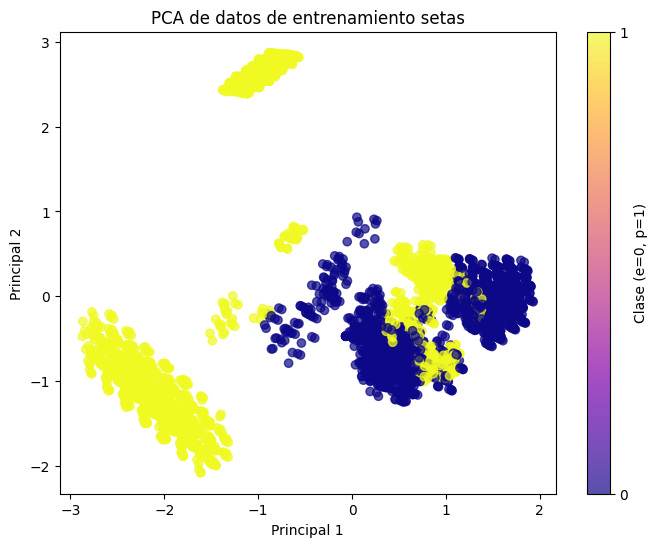

In [23]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({'e':0, 'p':1}), cmap='plasma', alpha=0.7)
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.title('PCA de datos de entrenamiento setas')
plt.colorbar(scatter, ticks=[0, 1], label='Clase (e=0, p=1)')
plt.show()

<font color="e5b714">Resumen scatterplot: el color amarillo(1) representa a que es venenosa y el color azul(0) representa a las comestibles,se ven manchas separadas, aunque no perfectamente separadas, hay zonas dominadas por las manchas amarillas, y hay zonas mezcladas</font>

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

<font color="e5b714">Vamos a transformar también las de test</font>

In [24]:
X_test_pca = pca.transform(X_test)


###<font color="#00304E">**Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más** </font>

In [26]:
# 1. Definir el clasificador y el número de estimadores
classifier = RandomForestClassifier(n_estimators=50, random_state=42)

In [27]:
# 2. Entrenar en train
classifier.fit(X_train_pca, y_train)
# classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [28]:
# 3. Calcular la precisión sobre test
y_pred = classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy}")
# y_pred = classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Precisión en el conjunto de prueba: {accuracy}")

Precisión en el conjunto de prueba: 0.9615814994405073


<font color="e5b714">Resumen: hemos entrenado con los datos ya aplicando el PCA, nos da una precisión del 96,16% lo que es bastante buena, aunque también hemos probado y dejamos comentada la prueba sin el PCA aplicado y el accuracy es bastante perfecto, un 100%.</font>

Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [39]:
#X_train_pca.shape
X_train.shape

(5442, 116)

<font color="e5b714">Como ya hemos aplicado el PCA nos salen simplemente 2 dimensionesque es lo que nos pedían, sin aplicar el PCA, nos saldrían 116, que son muchísimas columnas, así que vamos a probar con diferentes números de componentes, como nos piden, para ver el efecto en la precisión.</font>

¿Muchas features no? Vamos a reducir las usando PCA.

<font color="e5b714">Volvemos a definir PCA pero ya dentro de bucle y todos los pasos que nos piden.</font>

Entrenando con 1 componentes principales...
Precisión con 1 componentes: 0.8859
Entrenando con 11 componentes principales...
Precisión con 11 componentes: 1.0000
Entrenando con 21 componentes principales...
Precisión con 21 componentes: 1.0000
Entrenando con 31 componentes principales...
Precisión con 31 componentes: 1.0000
Entrenando con 41 componentes principales...
Precisión con 41 componentes: 1.0000
Entrenando con 51 componentes principales...
Precisión con 51 componentes: 1.0000
Entrenando con 61 componentes principales...
Precisión con 61 componentes: 1.0000
Entrenando con 71 componentes principales...
Precisión con 71 componentes: 1.0000
Entrenando con 81 componentes principales...
Precisión con 81 componentes: 1.0000
Entrenando con 91 componentes principales...
Precisión con 91 componentes: 1.0000
Entrenando con 101 componentes principales...
Precisión con 101 componentes: 1.0000
Entrenando con 111 componentes principales...
Precisión con 111 componentes: 1.0000


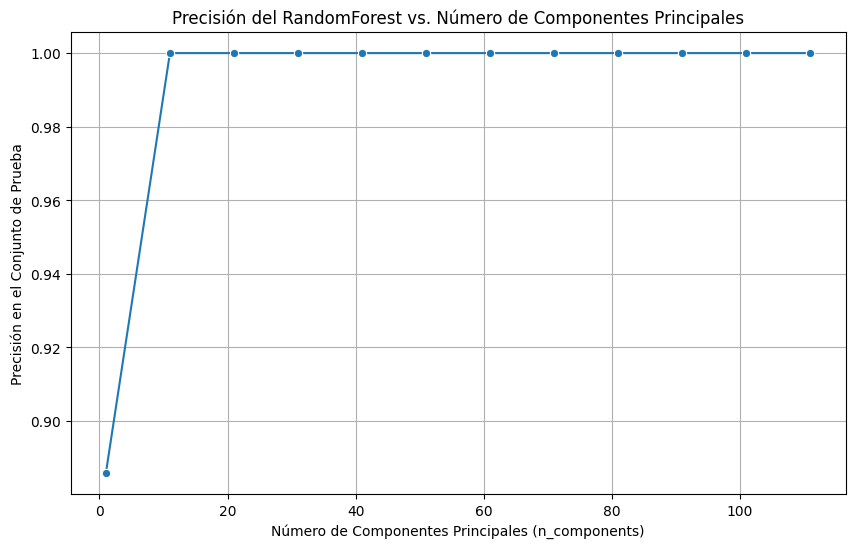

In [45]:
n_features = range(1, X_train.shape[1] + 1, 10)
scores = []

for n in n_features:
    print(f"Entrenando con {n} componentes principales...")

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n, random_state=42)
    # 2. Aprender PCA sobre X_train y transformar los datos de entrenamiento y prueba
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Entrenar Random Forest
    # 1. Definir el RF
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # 2. Entrenar clasificador
    classifier.fit(X_train_pca, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test_pca)

    # Calcular la precisión y guardarla
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"Precisión con {n} componentes: {accuracy:.4f}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(n_features), y=scores, marker='o')
plt.xlabel('Número de Componentes Principales (n_components)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.title('Precisión del RandomForest vs. Número de Componentes Principales')
plt.grid(True)
plt.show()

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

<font color="e5b714">Como dice en el texto, a partir de 11 ya tenemos el score perfecto.</font>

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




In [32]:
from sklearn.cluster import KMeans

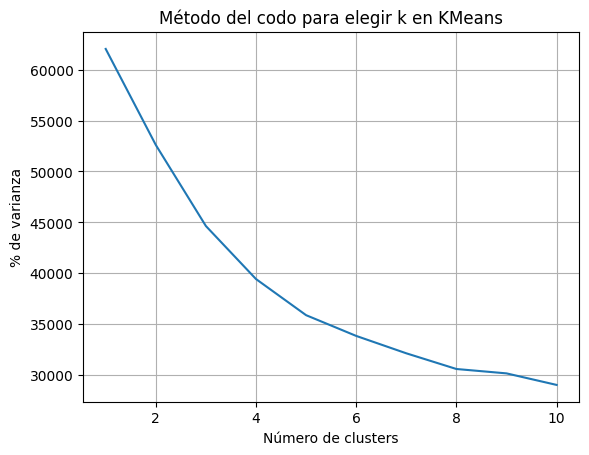

In [46]:
scores = []
k_values = range(1, 11)
for a in k_values:
    kmeans = KMeans(n_clusters=a, random_state=42, n_init=10)
    kmeans.fit(X_train)
    scores.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=scores, markers='o')
plt.title('Método del codo para elegir k en KMeans')
plt.xlabel('Número de clusters')
plt.ylabel('% de varianza')
plt.grid(True)
plt.show()

<font color="e5b714">Resumen: Yo creo que el 'codo' está en el 4 aproximadamente, luego empieza a aplanarse.</font>

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

In [34]:
# Aprender Kmeans con el valor de K obtenido.

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train)

In [35]:
# Preparar el catplot.
df_clusters = pd.DataFrame({
    'cluster': clusters,
    'class': y_train.values
})

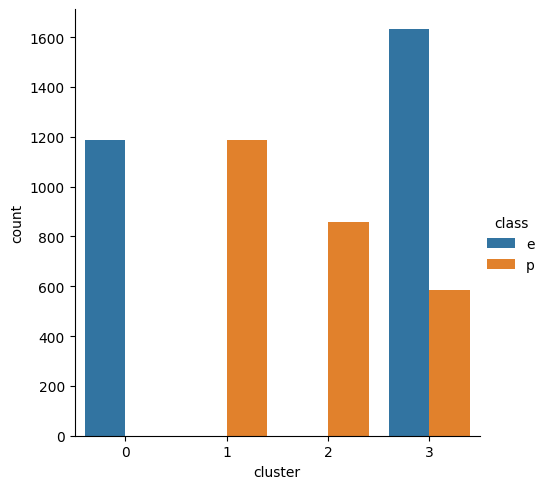

In [36]:
# Pintar.
ax = sns.catplot(x='cluster', hue='class', data=df_clusters, kind='count')

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

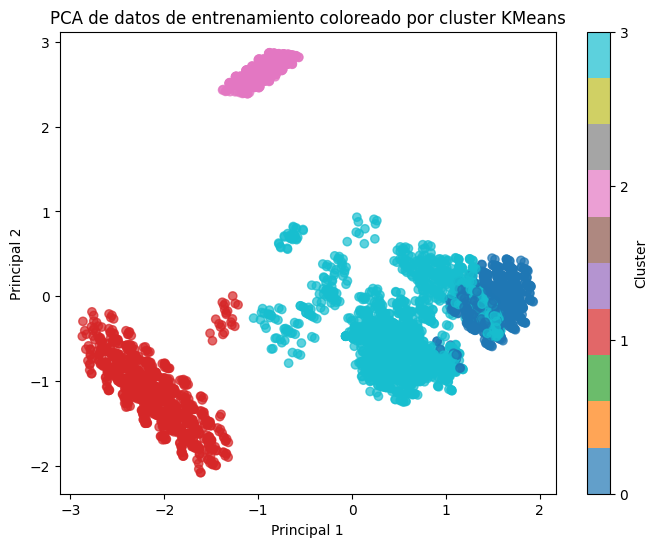

In [37]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.title('PCA de datos de entrenamiento coloreado por cluster KMeans')
plt.colorbar(scatter, ticks=range(4), label='Cluster')
plt.show()

¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.

<font color="e5b714">Resumen: KMeans ha conseguido separar bastante bien los puntos, aunque es mejor RandomForest, si no tuviéramos las etiquetas nos serviría mucho.</font>